Pour des rectangles de 1cm, on trace les temps obtenus

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Temperature = np.array([-114,-106,-97,-85.2, -75,-70.2,-61,-54])
Temps = np.array([2*60+5,2*60+10,2*60+38,3*60-3,3*60+35,4*60+19,4*60+34,10*60+25])

In [4]:
Temperature2 = np.array([-114,-106,-97,-85.2, -75,-70.2,-61])
Temps2 = np.array([2*60+5,2*60+10,2*60+38,3*60-3,3*60+35,4*60+19,4*60+34])

Text(0, 0.5, '$t_c$')

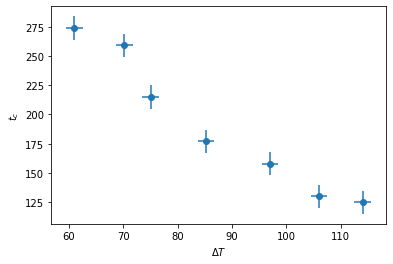

In [5]:
x_error = 1.5* np.ones_like(Temperature2)  # Incertitude sur la température de plus ou moins 1,5 degré
y_error = 10 * np.ones_like(Temps2)  # Incertitude sur le temps de plus ou moins 10 sec

plt.errorbar(-Temperature2, Temps2, xerr=x_error, yerr=y_error, fmt='o')

plt.xlabel(r'$\Delta T$')
plt.ylabel(r'$t_c$')

On sait que pour des rectangles identiques : $\Delta T \times t_c$ est une constante.

Text(0, 0.5, '$\\Delta T \\times t_c$')

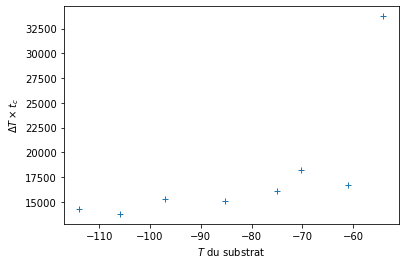

In [6]:
plt.plot(Temperature, -Temperature*Temps, '+')
plt.xlabel(r'$T$ du substrat')
plt.ylabel(r'$\Delta T \times t_c$')

### Temps estimés par le calcul

In [7]:
D_sans_T = 6.9e-9
h = 1e-2

def t_c(T):
    T = abs(T)
    D = D_sans_T*T
    return h**2/2 * 1/D


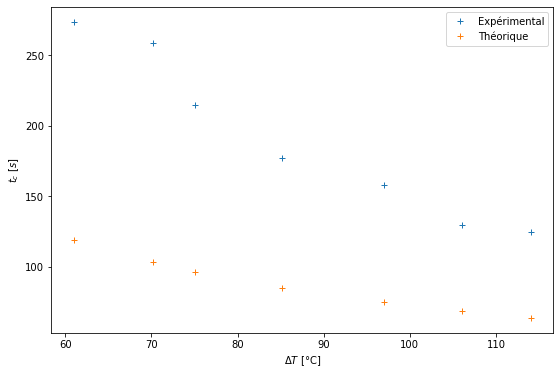

In [8]:
plt.figure(figsize=[9,6])

plt.plot(-Temperature2, Temps2, '+', label='Expérimental')
plt.plot(-Temperature2, t_c(Temperature2), '+', label='Théorique')
plt.xlabel(r'$\Delta T$ [°C]')
plt.ylabel(r'$t_c$ [$s$]')
plt.legend()

In [9]:
from scipy.optimize import curve_fit

Paramètre a: 16119.200825305017


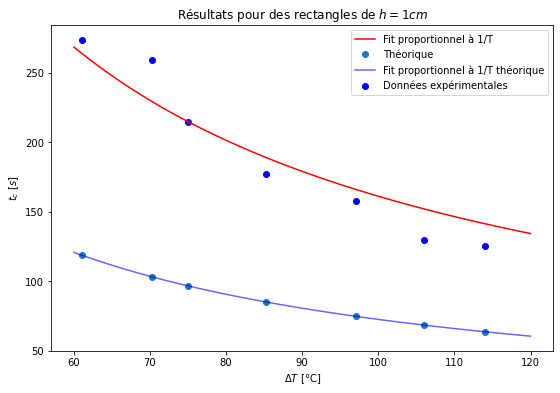

In [10]:
plt.figure(figsize=[9,6])

def func(x, a):
    return a / x

# Utiliser curve_fit pour ajuster la fonction à vos données
params, params_covariance = curve_fit(func, -Temperature2, Temps2)

params2, params_covariance2 = curve_fit(func, -Temperature2, t_c(Temperature2))

# Prédire les valeurs y
y_pred = func(-Temperature2, *params)


# Afficher les paramètres ajustés
print(f"Paramètre a: {params[0]}")

# Visualiser les résultats

T = np.linspace(60, 120, 100)

plt.scatter(-Temperature2, Temps2, color='blue', label='Données expérimentales')
plt.plot(T, func(T,params[0]), color='red', label='Fit proportionnel à 1/T')

plt.plot(-Temperature2, t_c(Temperature2), 'o', label='Théorique')
plt.plot(T, func(T,params2[0]), color='blue', label='Fit proportionnel à 1/T théorique', alpha=0.6)

plt.xlabel(r'$\Delta T$ [°C]')
plt.ylabel(r'$t_c$ [$s$]')


plt.title('Résultats pour des rectangles de $h = 1cm$')
plt.legend()
plt.show()

#### Avec triangle de même aire

In [11]:
Temperature_tri = np.array([-79,-94, - 71.6])
Temps_tri = np.array([60+48,60+36, 120+20])

def t_c_tri(T):
    T = abs(T)
    D = D_sans_T * T
    return h**2/(4*D)

Paramètre a: 16119.200825305017


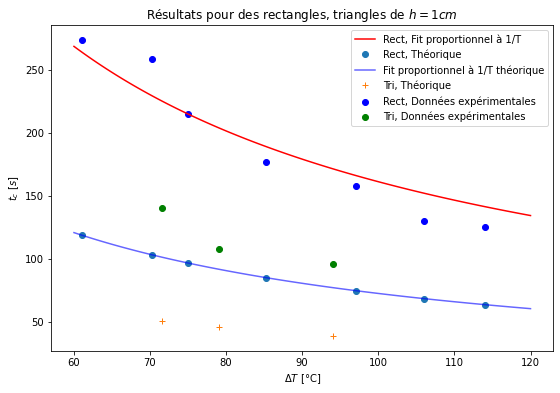

In [12]:
plt.figure(figsize=[9,6])

def func(x, a):
    return a / x

# Utiliser curve_fit pour ajuster la fonction à vos données
params, params_covariance = curve_fit(func, -Temperature2, Temps2)

params2, params_covariance2 = curve_fit(func, -Temperature2, t_c(Temperature2))

# Prédire les valeurs y
y_pred = func(-Temperature2, *params)


# Afficher les paramètres ajustés
print(f"Paramètre a: {params[0]}")

# Visualiser les résultats

T = np.linspace(60, 120, 100)

plt.scatter(-Temperature2, Temps2, color='blue', label='Rect, Données expérimentales')
plt.plot(T, func(T,params[0]), color='red', label='Rect, Fit proportionnel à 1/T')

plt.plot(-Temperature2, t_c(Temperature2), 'o', label='Rect, Théorique')
plt.plot(T, func(T,params2[0]), color='blue', label='Fit proportionnel à 1/T théorique', alpha=0.6)

plt.plot(-Temperature_tri, t_c_tri(Temperature_tri), '+', label='Tri, Théorique')
plt.scatter(-Temperature_tri, Temps_tri, color='green', label='Tri, Données expérimentales')

plt.xlabel(r'$\Delta T$ [°C]')
plt.ylabel(r'$t_c$ [$s$]')


plt.title('Résultats pour des rectangles, triangles de $h = 1cm$')
plt.legend()
plt.show()

### Résultats avec les rectangles de hauteur $h=6mm$

In [13]:
h = 6e-3

def t_c(T):
    T = abs(T)
    D = D_sans_T*T
    return h**2/2 * 1/D

In [14]:
Temperature3 = np.array([-88, -79, -74, -69.5, -58.5, -45, -39])
Temps3 = np.array([53, 59,60+10,60+15,60+22, 120+8,120+32])

Paramètre a: 5426.512557329917


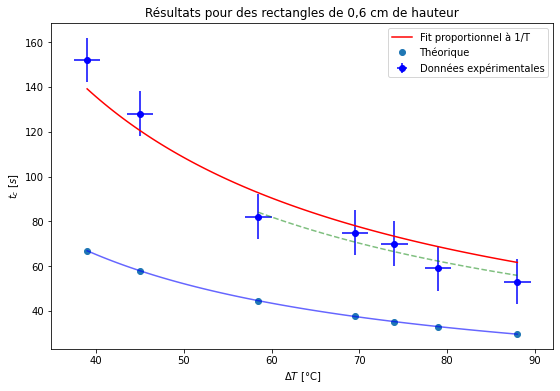

In [15]:
plt.figure(figsize=[9,6])

def func(x, a):
    return a / x

# Utiliser curve_fit pour ajuster la fonction à vos données
params, params_covariance = curve_fit(func, -Temperature3, Temps3)

params2, params_covariance2 = curve_fit(func, -Temperature3, t_c(Temperature3))


params4, params_covariance4 = curve_fit(func, -Temperature3[0:5], Temps3[0:5])

# Prédire les valeurs y
y_pred = func(-Temperature3, *params)


x_error = 1.5* np.ones_like(Temperature3)  # Incertitude sur la température de plus ou moins 1,5 degré
y_error = 10 * np.ones_like(Temps3)  # Incertitude sur le temps de plus ou moins 10 sec

plt.errorbar(-Temperature3, Temps3, xerr=x_error, yerr=y_error, fmt='o',color='blue', label='Données expérimentales')


# Afficher les paramètres ajustés
print(f"Paramètre a: {params[0]}")

# Visualiser les résultats

T = np.linspace(-Temperature3[-1], -Temperature3[0], 100)
Tbis = np.linspace(-Temperature3[4], -Temperature3[0], 100)

#plt.scatter(-Temperature3, Temps3, color='blue', label='Données expérimentales')
plt.plot(T, func(T,params[0]), color='red', label='Fit proportionnel à 1/T')

plt.plot(-Temperature3, t_c(Temperature3), 'o', label='Théorique')
plt.plot(T, func(T,params2[0]), color='blue', alpha=0.6)
plt.plot(Tbis, func(Tbis, params4[0]), color='green', alpha=0.5, linestyle='dashed')

plt.xlabel(r'$\Delta T$ [°C]')
plt.ylabel(r'$t_c$ [$s$]')


plt.title('Résultats pour des rectangles de 0,6 cm de hauteur')
plt.legend()
plt.show()

## Comparaison avec $y=x$

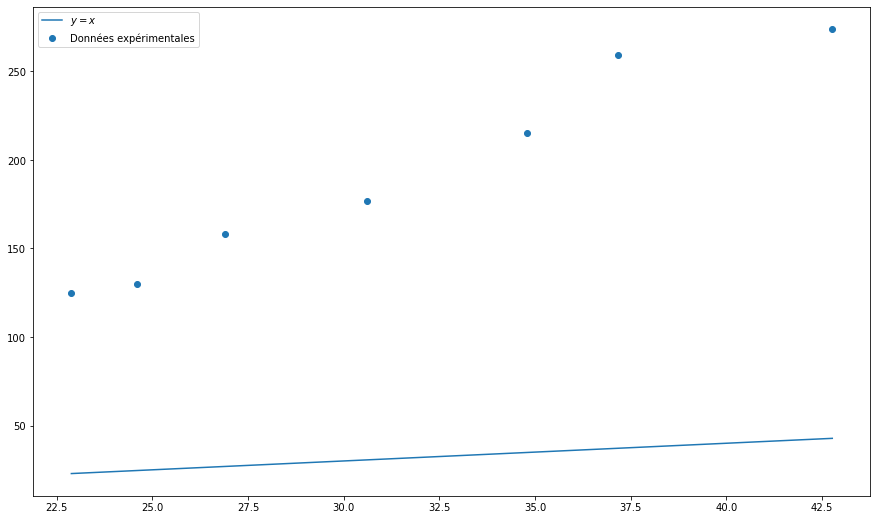

In [23]:
plt.figure(figsize=(15,9))

y = np.linspace(t_c(Temperature2)[0], t_c(Temperature2)[-1], 100)

plt.scatter(t_c(Temperature2), Temps2, label='Données expérimentales', )
plt.plot(y, y, label=r'$y=x$')

plt.legend()